# Homework 1: Regression, Regularization, and the Bias-Variance Trade-Off
***

**Name**: Maxwell Lambek

***

This assignment is due on Moodle by **5pm on Friday February 2nd**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**.  For a refresher on the course **Collaboration Policy** click [here](https://github.com/chrisketelsen/CSCI-4622-Machine-Learning/blob/master/resources/syllabus.md#collaboration-policy).

**NOTES**: 

- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 

In [2]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

### [10 points] Problem 1 - Getting Comfortable with MathJax/LaTeX
***

Most homeworks in this course will require you to write solutions to at least one or two math-based exercises.  This problem is designed to motivate you to learn some MathJax-LaTeX for typesetting math in Jupyter Notebooks.  [LaTeX](https://en.wikipedia.org/wiki/LaTeX) is a markup language used for typesetting mathematical formulas and documents.  [MathJax](https://en.wikipedia.org/wiki/MathJax) is a LaTeX plug-in for Markdown that brings some LaTeX functionality to Jupyter. A good tutorial on MathJax can be found in this [StackExchange post](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference/5024). 

Your goal is this problem is to use MathJax to reproduce a collection of formulas as accurately as possible. Note that because computing environments vary from person to person, you shouldn't worry about tiny details like matching fonts (though you should worry about normal vs italic vs bold).  Just do your best to get reasonably close. 

**Part A** Reproduce the expression shown below using MathJax: 

<img src="figs/prob1A.png" width="300">




\begin{align}
\hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1 x_{i1} + \hat{\beta}_2 x_{i2} + \dots + \hat{\beta}_p x_{ip}
\end{align}

**Part B** Reproduce the expression shown below using MathJax: 

<img src="figs/prob1B.png" width="180">




$$\begin{bmatrix}
1 & x_{11} \\
1 & x_{21} \\
1 & x_{31}
\end{bmatrix}
\begin{bmatrix}
\beta_0\\
\beta_1
\end{bmatrix}
=
\begin{bmatrix}
y_1 \\
y_2\\
y_3
\end{bmatrix}$$


**Part C** Reproduce the expression shown below using MathJax: 

<img src="figs/prob1C.png" width="250">




$$p(y = 1 \hspace{.1cm} \lvert \hspace{.1cm} x) = \frac{1}{1 + \exp(-\textbf{x}^T \beta) } $$

### [30 points] Problem 2 - Building a Data Storage Class 
***

In this exercise you will get some practice constructing classes in Python.  If you are rusty on object-oriented Python, you should check out [this tutorial](https://www.digitalocean.com/community/tutorials/how-to-construct-classes-and-define-objects-in-python-3).  Our goal will be to create a class which takes in a set of labeled data, randomly splits it into training and validation sets, and then stores these sets for later use. You will also implement the ability to mean-center and standardize features, and apply these same transformations to new test data after the fact.  A starting point for RegressionData class appears below.  

**Notes**: 
- This problem will be graded by unit test, so do not change function or method APIs, but feel free to create any additional variables or methods that you think will be helpful. We've given you access to versions of those unit tests down below, so you'll be able to check your work as you go.  
- Do not use any additional functions from sklearn.  (There is an sklearn function called train_test_split that does something similar.  You'll be allowed to use it later on.  This exercise is about getting your hands dirty so you can understand how things work under the hood)



In [294]:
class RegressionData:
    """
    Class to store data for regression problems 
    """
    def __init__(self, X, y, train_frac=0.8, center=False, standardize=False, random_state=1234):
        """
        Creates a RegressionData instance

        :param X: (n x p) ndarray of feature data 
        :param y: (n x 1) ndarray of labels/targets  
        :param train_frac: float indicating fraction of data to train on 
        :param center: bool indicating whether to mean-center the features 
        :param standardize: bool indicating whether to mean_center and standardize 
        :param random_state: integer seed for random number generators
        """
        
        # Set random seed (for testing purposes, don't change this line) 
        np.random.seed(random_state)
        
        # These should probably be set, eventually
        r = round(len(X)*train_frac)
        self.X_train = X[0:r]
        self.y_train = X[r:len(X)]
        self.X_valid = y[0:r]
        self.y_valid = y[r:len(y)]
        self.sdev = []
        self.mn = []
        #self.xsDev1 = None
        self.mean= None
        self.xmn = []
        self.sd = []
        #self.xsDev2= None
        #self.xmean2= None
        self.cen = False
        self.stn = False
        
        # Perform train-validation split 
        self.train_valid_split(X, y, train_frac)
            
        # standardize and/or center the data if requested
        self.transform_train_valid(center, standardize)
        
    def train_valid_split(self, X, y, train_frac):
        #print(X.shape[0])
        #print(X[3])
        #print(y)
        #print(X)
        """
        Randomly splits the data into training and validation sets 

        :param X: (n x p) ndarray of feature data 
        :param y: (n x 1) ndarray of labels/targets  
        :param train_frac: float indicating fraction of data to train on 
        """
        splitc = 0
        r = round(len(X)*train_frac)
        #print(r)
        #print(X[0:r])
        #tx = X
        rnd = np.random.permutation(len(X))
        #np.random.shuffle(y)
        #self.X_train = X[0:r]
        #self.X_valid = X[r:len(X)]
        #self.y_train = y[0:r]
        #self.y_valid = y[r:len(y)]
        #print(self.X_valid.shape[0])
        self.X_train = X[rnd[0:r]]
        self.y_train = y[rnd[0:r]]
        self.X_valid = X[rnd[r:len(X)]]
        self.y_valid = y[rnd[r:len(y)]]
        '''
        loc = np.arange(len(X))
        np.random.shuffle(loc)
        for i in range(0,r):
            self.X_train[i] = X[loc[i]]
            self.y_train[i] = y[loc[i]]
        for i in range(r,len(X)):
            print(i-r)
            self.X_valid[i-r] = X[loc[i]]
            self.y_valid[i-r] = y[loc[i]]
        '''
        #while (splitc < len(X)*train_frac):
           # splitc = splitc +1
           # r = np.random.randint(10)
           # if (r >= 8):
           #     self.X_valid = self.X_valid + [X[1]]
           # else:
           #     self.X_train = self.X_train + [X[1]]
        return
        
    def transform_train_valid(self, center, standardize):
        """
        Standardizes and/or centers train and validation sets, if requested

        :param center: bool indicating whether to mean-center the features 
        :param standardize: bool indicating whether to mean_center and standardize 
        """
        if center:
            self.cen = True
            #t1 = 0
            #t2 = 0
            t = [0]*len( self.X_train[0] )
            for i in range(len(self.X_train)):
                for j in range(len(self.X_train[0])):
                    t[j] = t[j] +  self.X_train[i][j]
                #t1 = t1 + self.X_train[i][0]
                #t2 = t2 + self.X_train[i][1]
            #m = [0]*len( self.X_train[0] )
            for i in range(len(t) ):
                #m[i] = t[i]/len(self.X_train)
                self.mn = self.mn + [ t[i]/len(self.X_train)  ]
            #m1 = t1/len(self.X_train)
            #m2 = t2/len(self.X_train)
            #m1 = self.mn[0]
            #m2 = self.mn[1]
            #self.xmean1 = m1
            #self.xmean2 = m2
            for i in range(len(self.X_train)):
                for j in range( (len(self.mn))  ):
                    self.X_train[i][j] = self.X_train[i][j] - self.mn[j]
                #self.X_train[i][0] = self.X_train[i][0] - m1
                #self.X_train[i][1] = self.X_train[i][1] - m2
            for i in range(len(self.X_valid)):
                for j in range( (len(self.mn))  ):
                    self.X_valid[i][j] = self.X_valid[i][j] - self.mn[j]
                #self.X_valid[i][0] = self.X_valid[i][0] - m1
                #self.X_valid[i][1] = self.X_valid[i][1] - m2
        if standardize:
            self.stn = True
            '''
            if not center:
                t = [0]*len( self.X_train[0] )
                for i in range(len(self.X_train)):
                    for j in range(len(self.X_train[0])):
                        t[j] = t[j] +  self.X_train[i][j]

                for i in range(len(t) ):
                #m[i] = t[i]/len(self.X_train)
                    self.mn = self.mn + [ t[i]/len(self.X_train)  ]
                #m1 = self.mn[0]
                #m2 = self.mn[1]
            #m1 = t1/len(self.X_train)
            #m2 = t2/len(self.X_train)
            s1 = 0
            s2 = 0
            for i in range(len(self.X_train)):
                s1 = s1 + (self.X_train[i][0] - self.mn[0])**2
                s2 = s2 + (self.X_train[i][1] - self.mn[0])**2
            s1 = np.sqrt(s1/len(self.X_train))
            s2 = np.sqrt(s2/len(self.X_train))
            self.xsDev1 = s1
            self.xsDev2 = s2
            for i in range(len(self.X_train)):
                self.X_train[i][0] = self.X_train[i][0]/s1
                self.X_train[i][1] = self.X_train[i][1]/s2
            for i in range(len(self.X_valid)):
                self.X_valid[i][0] = self.X_valid[i][0]/s1
                self.X_valid[i][1] = self.X_valid[i][1]/s2
            '''
            self.xmn = [0]*len(self.X_train)
            self.sd = [0]*len(self.X_train)
            for jj in range(self.X_train.shape[1]):
                self.xmn[jj] = np.mean(self.X_train[:,jj])
                self.sd[jj] = np.std(self.X_train[:,jj])
                self.X_train[:,jj] = (self.X_train[:,jj] - self.xmn[jj])/self.sd[jj]
            for jj in range(self.X_valid.shape[1]):
                self.X_valid[:,jj] = (self.X_valid[:,jj] - self.xmn[jj])/self.sd[jj]
                
        return
        
    def transform(self, X):
        """
        Applies transformations performed on training set to 
        previously unseen data x 

        :param X: (m x p) ndarray of feature data 
        """
        Xt = X.copy()
        
        #for jj in range(X.shape[1]):
            #mujj = np.mean(self.X_train[:,jj])
            #sdjj = np.std(self.X_train[:,jj]-mujj)
            #X[:,jj] = (X[:,jj]-mujj)/sdjj
        #for jj in range(self.X_train.shape[1]):
            #x[:,jj] = (x[:,jj] - self.xmn[jj])/self.sd[jj]
        for jj in range(Xt.shape[1]):
            #xmn = np.mean(self.X_train[:,jj])
            #sd = np.std(self.X_train[:,jj])
            Xt[:,jj] = (Xt[:,jj] - self.xmn[jj])/self.sd[jj]
            #X[:,0] = (X[:,0] - self.xmean1)/self.xsDev1
            #X[:,1] = (X[:,1] - self.xmean2)/self.xsDev2
        
        '''
        if (self.cen & self.stn):
            for i in range(len(X)):
                X[i][0] = (X[i][0]- self.xmean1)/self.xsDev1
                X[i][1] = (X[i][1]- self.xmean2)/self.xsDev2
        
            Xt = X.copy()
            return Xt
        if self.cen:
            for i in range(len(X)):
                X[i][0] = (X[i][0]- self.xmean1)
                X[i][1] = (X[i][1]- self.xmean2)
        
            Xt = X.copy()
            return Xt
        if self.stn:
            for i in range(len(X)):
                X[i][0] = X[i][0]/self.xsDev1
                X[i][1] = X[i][1]/self.xsDev2
        
            Xt = X.copy()
            return Xt 
        '''
        
        return Xt

**Part A**: Complete the method `train_valid_split` to randomly initialize the train and validation data according to the split proportion indicated by `train_frac`. When you think you're done, execute the unit tests at the end of this problem.  If you're successful, you should pass the first 2 tests.  Don't move on until you've passed them! 


**Part B**: Complete the method `transform_train_valid` function to standardize and/or center the features depending on the values of `center` and `standardize`.  Remember that if both flags are set, each column in the **training data** should be shifted to have mean zero, and then scaled to have standard deviation of 1. Each column of the validation data should then undergo the same shift and scale **based on the training data**.  When you think you're done, execute the unit tests again. If you're successful, you should pass four more unit tests.  Don't move on until you do! 

**Notes**: 

- How you implement this method might affect **Part C**.  It's a good idea to read **Part C** now so that you can plan ahead. 
- It's rare in a regression setting that you would ever standardize a feature without centering it first, so we will not be testing this case. 

**Part C**: Suppose that later on in your pipeline you collect a new set of data that you would like to test your model on.  Since your model was probably constructed using the transformed features of your training set, you have to apply that same transformation to your new data.  Complete the `transform` function above so that it takes in an ndarray of newly acquired data and returns the appropriately transformed version. When you think you're done, execute the unit tests one more time.  If you're successful, you should pass the final test, at which point you will be done with this problem forever (sorta).   


In [295]:
# Execute this cell to run unit tests 
%run -i tests/tests.py

..
----------------------------------------------------------------------
Ran 2 tests in 0.011s

OK
....
----------------------------------------------------------------------
Ran 4 tests in 0.014s

OK
.
----------------------------------------------------------------------
Ran 1 test in 0.003s

OK


### [30 points] Problem 3 - Solving Ridge Regression
***

In this problem you'll derive a closed form solution for single-feature Ridge Regression and use it to interpret the behavior for different values of the regularization parameter $\lambda$. Recall that for a model of the form $Y = \beta_0 + \beta_1 X + \epsilon$ and a training set $\{(x_i, y_i)\}_{i=1}^n$, the parameter estimates are obtained by minimizing the penalized RSS: 

$$
\hat{\boldsymbol{\beta}} = \underset{\boldsymbol{\beta}}{\textrm{argmin}} ~\textrm{RSS}_\lambda =  \underset{\boldsymbol{\beta}}{\textrm{argmin}} \sum_{i=1}^n \left( \beta_0 + \beta_1 x_i - y_i\right)^2 + \lambda \beta_1^2
$$

In Calc 1 you saw that you can find the value of the parameter that minimizes a function by taking a derivative with respect to that parameter, setting it to 0, and solving. The problem here is that we have **two** parameters we need to minimize over. It turns out, for a certain class of problems, we can solve for two parameters in a similar way.  For two parameters we can take _partial_ derivatives with respect to each parameter, set equal to zero, and solve simultaneously for the optimal parameters.  That is, we want to solve the following two equations for $\beta_0$ and $\beta_1$: 

$$
\dfrac{\partial~\textrm{RSS}_\lambda}{\partial \beta_0} = 0 
\quad \textrm{and} \quad
\dfrac{\partial~\textrm{RSS}_\lambda}{\partial \beta_1} = 0 
$$

Simple enough, right?  Kinda.  It turns out that even this is a bit tricky, unless you modify your data in a particular way. 

**Part A**: Suppose that we mean-center our feature $x$ by replacing each $x_i$ by $\hat{x}_i = x_i - \bar{x}$. Show that in this case, the Ridge Regression estimate of the bias is $\hat{\beta}_0 = \bar{y}$ (the sample mean of the response $y$) by taking the partial derivative of $\textrm{RSS}_\lambda$ with respect to $\beta_0$, setting it to zero, and solving for $\beta_0$. 

$$\frac{\partial  }{\partial \beta_0 } RSS_\lambda = \frac{\partial  }{\partial \beta_0 }  \sum_{i=1}^n (\beta_0 + \beta_1 \hat{x}_i - y_i)^2 + \lambda \beta_1^2 $$
$$=\sum_{i=1}^n \frac{\partial  }{\partial \beta_0 } (\beta_0 + \beta_1 \hat{x}_i - y_i)^2 + 0  $$
$$= \sum_{i=1}^n 2(\beta_0 + \beta_1 \hat{x}_i - y_i)(1+0-0) $$
Now we can set this equal to zero and solve for $\beta_0$,
$$\sum_{i=1}^n 2(\hat{ \beta_0} + \beta_1 \hat{x}_i - y_i) = 0  $$

$$2n\hat{ \beta_0} + 2\beta_1 \sum_{i=1}^n \hat{x}_i - 2 \sum_{i=1}^n y_i = 0 $$

$$\hat{\beta_0} = \frac{\sum_{i=1}^n y_i - \beta_1 \sum_{i=1}^n \hat{x}_i }{n} $$

$$= \frac{\sum_{i=1}^n y_i}{n} - \frac{\beta_1 \sum_{i=1}^n \hat{x}_i}{n} $$

$$ = \bar{y} - \frac{\beta_1\sum_{i=1}^n (x_i - \bar{x}) }{n} $$

$$ = \bar{y} - \beta_1(\frac{\sum_{i=1}^n x_i}{n} - \frac{\sum_{i=1}^n \bar{x}}{n}  ) $$

$$= \bar{y} - \beta_1(\bar{x} - \bar{x} ) = \bar{y} $$

And thus we have,
$$\hat{\beta_0} = \bar{y}$$

**Part B**: Next, solve for the Ridge Regression estimate of the slope, $\hat{\beta}_1$, by taking the partial derivative of $\textrm{RSS}_\lambda$ with respect to $\beta_1$, setting it to zero, and solving for $\beta_1$ as a function of the data and of $\lambda$.  (**Hint**: You'll want to use the value of $\hat{\beta}_0$ you found in **Part A**). 


$$\frac{\partial  }{\partial \beta_1 }  \sum_{i=1}^n (\beta_0 + \beta_1 \hat{x}_i - y_i)^2 + \lambda \beta_1^2 $$
$$= \sum 2(\bar{y} + \beta_1 \hat{x_i} - y_i )(\hat{x_i} ) + 2 \lambda \beta_1 $$




$$= 2(\sum \bar{y} \hat{x_i} + \sum \beta_1 \hat{x_i}^2 - \sum y_i \hat{x_i} ) + 2 \lambda \beta_1 $$
Setting equal to zero and moving $\beta_1$ over gives,
$$2\beta_1 (\sum \hat{x_i}^2 + \lambda ) = -\sum \bar{y} \hat{x_i} + \sum y_i \hat{x_i} $$
$$\beta_1 = \frac{ \sum y_i \hat{x_i} }{\sum \hat{x_i}^2 + \lambda } $$


**Part C**: Use the closed-form solution you found in **Part B** to _briefly_ describe the effect of the regularization parameter $\lambda$ on the slope parameter as $\lambda \rightarrow 0$ and $\lambda \rightarrow \infty$. Does this jive with the discussion of regularization from class? 

$$\lim_{\lambda \to 0} \frac{ \sum y_i \hat{x_i} }{\sum \hat{x_i}^2 + \lambda }  = \frac{ \sum y_i \hat{x_i} }{\sum \hat{x_i}^2 }$$
If $y_i = x_i$ we get $\hat{\beta_1} = 1$. This makes sense becuase we are saying that the rate of change for the slope is constant i.e. we are not weighting the parameters differently based on the data.


$$\lim_{\lambda \to \infty} \frac{ \sum y_i \hat{x_i} }{\sum \hat{x_i}^2 + \lambda } = 0$$
This makes sense since we are regularizing so much that we should see no change in the model no matter what data we input i.e. we get a flat line.

**Part D**: Verify that the solution obtained in **Parts A** and **B** are correct by testing it on some simulated data and comparing the results to those obtained by sklearn's [Ridge Regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) routine.  We've given you some data below, but feel free to mess with the parameters. 

In [382]:
lam = 2.0 
X = np.random.uniform(size=(200,1))
y = 2 + 3 * X[:,0] + 0.5*np.random.randn(200)

# Load the data into our data structure and center it 
cdata = RegressionData(X, y, center=True)

# Compute beta_0 and beta_1 using the formulas you derived above
b0 = np.mean(cdata.y_train)
#print(np.sum(cdata.y_train*cdata.X_train ) )
xhat = cdata.X_train - np.mean(cdata.X_train) 
b1 = np.sum( np.dot( cdata.y_train , xhat ) ) /(np.sum(xhat**2)  + lam)
#b1 = (np.sum(cdata.y_train*cdata.X_train ) - np.mean(cdata.X_train)*np.sum(cdata.y_train))/( np.sum( (cdata.X_train - np.mean(cdata.X_train))**2 ) +lam )
#b1 = (sum(y*X) - len(X)*np.mean(X)*np.mean(y))/(2*(sum(X**2) - len(X)*np.mean(X)**2 + lam )  )

# Compute beta_0 and beta_1 by calling Ridge()
from sklearn.linear_model import Ridge
rg = Ridge(alpha = lam)
rg.fit(cdata.X_train,cdata.y_train)
print(rg.intercept_)
print(rg.coef_)
print(b0)
print(b1)
#bs0, bs1 = rg.predict(y), rg.predict(X) 

3.44705427463
[ 2.54415922]
3.44705427463
2.54415922407


**Part E**: We claimed in the class that if you built a regularized regression model based on centered features, the model would make the same prediction as an equivalent model built with un-centered features. Verify this fact by 

- Predicting the response for your centered Validation set using the model you computed on your own.  
- Predicting the response for the equivalent un-centered Validation set using sklearn's Ridge model trained on the un-centered features. 
- Showing that the predictions are the same for a reasonable subset of the Validation set. 


In [389]:

cdata2 = RegressionData(X, y, center=False)

rg = Ridge(alpha = lam)
rg.fit(cdata2.X_train,cdata2.y_train)
pred = rg.predict(cdata2.X_valid)

otherpred = b0 + b1*cdata.X_valid
#print(otherpred)
#print(cdata2.X_valid[2])
#print()
#for ii in range(len(otherpred)):
    #print(b0 + b1*cdata2.X_valid[ii])
    #otherpred[ii] = b0 + b1*cdata2.X_valid[ii]
#print(otherpred)
#np.subtract(pred , otherpred)
for ii in range(len(pred)):
    print(pred[ii]-otherpred[ii])

#p = np.poly1d([b0,b1] )
#rp = np.poly1d([rg.intercept_, rg.coef_])
#p - rp

[ 0.]
[ 0.]
[  4.44089210e-16]
[  4.44089210e-16]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[  4.44089210e-16]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ -8.88178420e-16]
[ -8.88178420e-16]
[ 0.]
[ 0.]
[  4.44089210e-16]
[ 0.]
[ 0.]
[  4.44089210e-16]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[  4.44089210e-16]
[  4.44089210e-16]
[ 0.]
[  4.44089210e-16]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[  4.44089210e-16]


### [30 points] Problem 4 - Polynomial Regression  and the Bias-Variance Trade-Off
***

In this problem you will use polynomial regression to explore the Bias-Variance Trade-Off. Assume that our data comes from a model of the form 

$$Y = f(X) + \epsilon ~~\textrm{ where }~~ \epsilon \sim N(0,\sigma^2)$$ 

For our experiments we'll use $f(x) = \sin(\pi x)$. The following functions can be used to generate data from this distribution:

In [53]:
def true_f(x):
    """
    Returns sin(pi*x) for array of x values
    
    :@param x: ndarray of feature values
    """
    return np.sin(np.pi * x)

**Part A**: Generate a sample of size $n=20$ for $x$-values chosen from a uniform distribution between $0$ and $1$.  Make a scatter plot of the data overlayed with the curve of the true function $f(x) \sin(\pi x)$. 

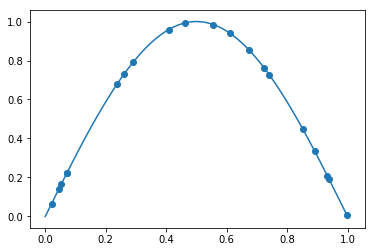

In [77]:
x = np.random.uniform(size=20)
d = true_f(x)
fig, ax = plt.subplots()
ax.scatter(x,d)
sindata = np.linspace(0,1,100)
sdata = true_f(sindata)
ax.plot(sindata,sdata)
#plt.scatter(xline)

**Part B**: Next we need to create a function that can fit a polynomial model to training data and make predictions for unseen data.  Complete the function `poly_predict` below to accomplish this.  Note that there are many ways to do this in Python.  Later this week we'll look into doing this with Scikit-Learn.  You're free to implement it using Scikit-Learn, but you might want to look into Numpy's polynomial fitting functions, [polyfit](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polyfit.html) and [polyval](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polyval.html).

Demonstrate that your function is working by using it to generate a plot (similar to those shown in lecture) that include the true function $f(x)$, a scatter plot of your training data, and the curve representing your fitted model. 

Text(0.5,1,'sin(x) predicted with a 3rd order polynomial')

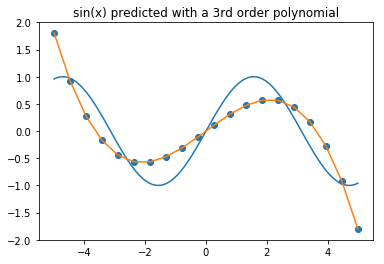

In [296]:
def poly_predict(x_train, y_train, x_valid, deg):
    """
    Function to train polynomial regression model on training data
    and then return a vector of predictions on validation data
    
    :@param x_train: vector of training features
    :@param y_train: vector of training responses
    :@param x_valid: vector of validation features to make predictions with
    :@param deg: degree of the polynomial model 
    """
    #from sklearn.preprocessing import PolynomialFeatures

    #coef = np.polyfit(x_train,y_train,deg)
    prediction = np.polyval(np.polyfit(x_train,y_train,deg), x_valid)
    #for ii in range(len(x_valid)):
    #    prediction[ii] = coef[deg]
    #    for jj in range(deg):
    #        prediction[ii] = prediction[ii] + (x_train[ii]**jj)*(coef[jj])
    #print(coef, "coef")

    
    
    #prediction = np.zeros_like(x_valid) #TODO
    #print(prediction)
    return prediction
#x = np.random.uniform(-10,10,size=100)'
x = np.linspace(-5,5,100)
y = true_f(x/np.pi)
xvalid = np.linspace(-5,5,20)
#xvalid = np.random.uniform(-4,4,size=50)
#print(xvalid)
p = poly_predict(x,y,xvalid,3)
fig, ax = plt.subplots()
ax.scatter(xvalid,p)
ax.plot(x,y)
ax.plot(xvalid,p)
ax.set_title('sin(x) predicted with a 3rd order polynomial')




**Part C**: Our goal now will be to make a plot of the decomposition of the expected validation MSE into it's constituent parts.  Recall that we showed in lecture that the expected test MSE can be written as 

$$
\textrm{E}\left[\left(y_0 - \hat{f}(x_0) \right)^2\right] = \left[~f(x_0) - \textrm{E}[~\hat{f}(x_0)~] \right]^2
+ \textrm{E}\left[ ~ \textrm{E}[~\hat{f}(x_0)]-\hat{f}(x_0)~\right]^2 + \textrm{Var}(\epsilon)
= \left[\textrm{Bias}(~\hat{f}(x_0)\right]^2 + \textrm{Var}(~\hat{f}(x_0)~) + \textrm{Var}(\epsilon)
$$

where $x_0$ represents unseen validation data. We're going to run simulations to estimate $\left[\textrm{Bias}(~\hat{f}(x_0)\right]^2$ and $\textrm{Var}(~\hat{f}(x_0)~)$ for different polynomial models and then plot them against estimates of the true validation MSE. The function `bias_variance_study` below will help you do this.  You just need to fill in a few key parts.  At the end of the day, you should have a plot that looks like this for certain choices of the simulation parameters. 

The $\textrm{Bias}^2$ term is given by 

$$
\left[\textrm{Bias}(~\hat{f}(x_0)\right]^2 = \left[~f(x_0) - \textrm{E}[~\hat{f}(x_0)~] \right]^2
$$

The first term inside the square is simply the true function $f$ evaluated on the validation data.  The second term inside the square, $\textrm{E}[~\hat{f}(x_0)~]$, is the expected value of all estimated models evaluated on the validation data.  We can estimate this by sampling many many training sets, fitting models, evaluating them on many validation sets, and then taking the average. Complete the `squared_bias` function below to do this computation.  

The next step is to estimate the $\textrm{Variance}$.  Let's unpack it 

$$
\textrm{E}\left[ ~ \hat{f}(x_0) - \textrm{E}[~\hat{f}(x_0)]~\right]^2
$$

Note that $\textrm{E}[~\hat{f}(x_0)]$ is the `mean_model` we got from the `squared_bias` function. The other term, $\hat{f}(x_0)$, is a model estimated on a random training set, and then evaluated on the validation set.  Since we're wrapping this whole thing in an expectation, we're going to sample many many training sets, estimate $\hat{f}(x_0)$, and then compute the mean squared deviation between these and the `mean_model`.  You will add code to the function below to accomplish this. 

We'll also estimate the validation MSE so we can compare this to the bias-variance decomposition, but this portion of the code is completed for you. 

Note that there are only three lines in the code that you need to modify (though, feel free to be more verbose if you like), each marked with a `#TODO`.  When everything is done, running the function call given below should produce a plot similar to [this](https://github.com/chrisketelsen/CSCI-4622-Machine-Learning/blob/master/hmwk/hmwk01/figs/bias_var_plot.png). 

In [340]:
def bias_variance_study(num_data, num_sims, train_frac=0.8, noiseSTD=0.4, max_deg=10, random_state=1234):
    '''
    Function to run simulations and estimate the squared-bias, variance, and 
    validation error of polynomial regression models. 
    
    :@param num_data: number of points in simulated data set 
    :@param num_sims: number of simulations to run 
    :@param train_frac: fraction of total data in training set
    :@param noiseSTD: standard deviation of noise in data 
    :@param max_deg: largest degree polynomial to analyze
    :@param random_state: seed for random state, for reproducibility
    '''
    # Set random seed 
    np.random.seed(random_state)
    
    # array of polynomial degrees
    degrees = range(1,max_deg+1)
    
    # train/valid split sizes 
    nTrain = int(np.ceil(train_frac * num_data))
    nValid = num_data - nTrain
    
    # Generate grid of features and shuffle them 
    xGrid = np.linspace(-1,1,num_data)
    np.random.shuffle(xGrid)
    
    # Spit into training and validation sets 
    xTrain = xGrid[:nTrain]
    #print(xTrain)
    xValid = xGrid[nTrain:]
    
    # Dictionaries for predictions and MSE measurements
    # Keys are polynomial degree. Each prediction is column 
    # of nValid x num_sims array. Each mse is entry in vector
    # of length num_sims 
    yHatValid = {deg: np.zeros((nValid, num_sims)) for deg in degrees}
    msesValid = {deg: np.zeros(num_sims) for deg in degrees}
    bias0 = {deg: np.zeros(num_sims) for deg in degrees}
    
    # Loop over num_sims simulated data sets
    for tsID in range(num_sims):
        
        # Generate training and validation responses 
        yTrain = true_f(xTrain) + noiseSTD*np.random.randn(nTrain)
        yValid = true_f(xValid) + noiseSTD*np.random.randn(nValid)
        
        # Loop over polynomial degree.  Use function from part B 
        # to fit to training set and predict on validation set.
        # Store predictions those predictions in yHatValid[deg]
        for deg in degrees:
            yHatValid[deg][:,tsID] = poly_predict(xTrain, yTrain, xValid,deg ) #np.zeros_like(xValid) #TODO
            msesValid[deg][tsID] = np.mean((yValid-yHatValid[deg][:,tsID])**2)
            bias0[deg][tsID] = np.mean(true_f(xValid)- yHatValid[deg][:,tsID] )**2
            #variance0[deg][tsID] = np.mean(yHatValid[deg][:,tsID] - np.mean(yHatValid[deg][:,tsID]))
    #print(tsID)
    # Loop over each polynomial degree and compute squared-bias, variance, 
    # and mean MSE on validation set.  
    #print(yHatValid[1][:,1])
    #print(true_f(xValid))
    #print(np.mean(yHatValid[deg]))
    #print(yValid)
    #print(xValid)
    #print(np.mean(yHatValid[deg]))
    #print(yHatValid[3][2,:])
    sqBias, variance, mseValid,rs = np.zeros(max_deg), np.zeros(max_deg), np.zeros(max_deg), np.zeros(max_deg)
    
    for ii, deg in enumerate(degrees):
        #for jj in range(len(yHatValid[deg][:,1])  ):
            #sqBias[ii] = np.mean(true_f(xValid) - np.mean(yHatValid[deg][:,jj]))
            #variance[ii] = np.mean(yHatValid[deg][:,jj] - np.mean()  )
        print(yHatValid[deg])
        sqBias[ii] =  np.mean((true_f(xValid) - np.mean(yHatValid[deg],axis=1))**2) #TODO
        variance[ii] = np.mean(np.var(yHatValid[deg], axis=1)) #np.mean(variance0[deg])**2 #np.mean(true_f(yHatValid[deg][:,ii]) - np.mean(yHatValid[deg][:,ii]) )**2 
        mseValid[ii] = np.mean(msesValid[deg])
            
            
        
        
    # Plot squared bias, variance, and validation MSE 
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))
    ax.plot(degrees, sqBias, color="steelblue", lw=3, label="Bias**2")
    ax.plot(degrees, variance, color="#a76c6e", lw=3, label="Variance")
    ax.plot(degrees, mseValid, color="black", lw=3, label="Valid MSE")
    ax.grid(alpha=0.25)
    ax.set_xlabel("Model Complexity (Poly Degree)", fontsize=16)
    ax.set_ylabel("Error", fontsize=16)
    ax.legend(loc="upper center", fontsize=12)
    
    # Return arrays of squared-Bias, variance, and MSE 
    return sqBias, variance, mseValid

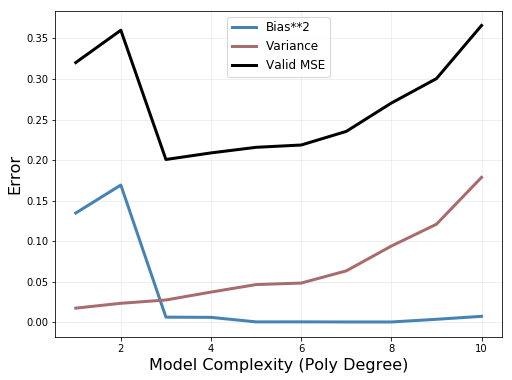

In [341]:
sqBias, variance, mseValid = bias_variance_study(30, 100, train_frac=0.80, random_state=1241)

**Part D**: When everything is working, increase the size of the simulated data sets and the number of simulation runs and compare the difference between the validation MSE and the sum of the squared-Bias the Variance for each polynomial degree.  Try this for several values of the standard deviation of the model noise.  What do you notice?  How can you explain this result using the notions of Bias-Variance and Reducible and Irreducible error discussed in class?  

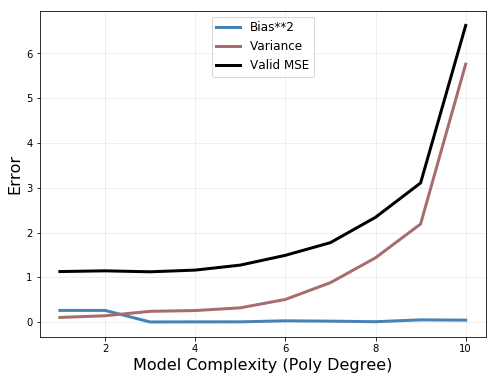

In [417]:
sqBias, variance, mseValid = bias_variance_study(20, 50, train_frac=0.80, random_state=1241, noiseSTD=1.0)

When the amount of data is reduced the model has an extremly high mean square error as the number of polynomial degrees increases. This makes sence becuase there is not enough data to fit a high degree polynomial to. Increasing the amount of data makes it so a high degree polynomial can fit the data without a large amount of error. Having a higher amount of simulations smooths the out how the valid MSE works, and this makes sence because having very few simulations is similar to having a small amount of data in the sence that the model isn't guarenteed to be close to having a normal distribution. With the Bias-Variance tradeoff we see that with low amounts of data causes the variance to increase rapidly and the bias reaches zero very quickly this is due to the fact that as number of data points decreases higher order polynomials approach an exact fit to the data, which means that the model is starting to fit the noise.
Increasing the noise adds adds irreducible error to the model which increasing the degree of the poly only fits the noise and does not fit the true function.